In [9]:
import json

import pandas as pd

In [10]:
def parse_performance_json(exp_name: str):
    with open(f"out/results/{exp_name}.json", "r") as f:
        data = json.load(f)

    dfs = {}
    for model in data.keys():
        print(f"Model: {model} -> {len(data[model])} folds")

        df = pd.DataFrame(data[model])
        df["model"] = model

        df = df[["model", "fold", "accuracy", "precision", "recall", "f1", "roc_auc"]]

        dfs[model] = df
        # dfs[model]["model"] = model
        # dfs[model]["exp_name"] = exp_name

    df = pd.concat(dfs, axis=0)
    return df

In [11]:
parse_performance_json("SeaAD")

Model: Cell-level -> 1 folds
Model: Pseudobulk -> 1 folds
Model: scRAT -> 1 folds
Model: scAGG -> 1 folds
Model: scAGG+GAT -> 1 folds
Model: scAGG+GAT+AP -> 1 folds
Model: scAGG+AP -> 1 folds


,,model,fold,accuracy,precision,recall,f1,roc_auc
Cell-level,0,Cell-level,0,0.825,0.842105,0.969697,0.901408,0.549784
Pseudobulk,0,Pseudobulk,0,0.300,1.000000,0.151515,0.263158,0.818182
scRAT,0,scRAT,0,0.825,0.825000,1.000000,0.904110,0.500000
scAGG,0,scAGG,0,0.375,1.000000,0.242424,0.390244,0.822511
scAGG+GAT,0,scAGG+GAT,0,0.250,1.000000,0.090909,0.166667,0.683983
scAGG+GAT+AP,0,scAGG+GAT+AP,0,0.175,0.000000,0.000000,0.000000,0.705628
scAGG+AP,0,scAGG+AP,0,0.175,0.000000,0.000000,0.000000,0.826840


Model: Cell-level -> 1 folds
Model: Pseudobulk -> 1 folds
Model: scRAT -> 1 folds
Model: scAGG -> 1 folds
Model: scAGG+GAT -> 1 folds
Model: scAGG+GAT+AP -> 1 folds
Model: scAGG+AP -> 1 folds


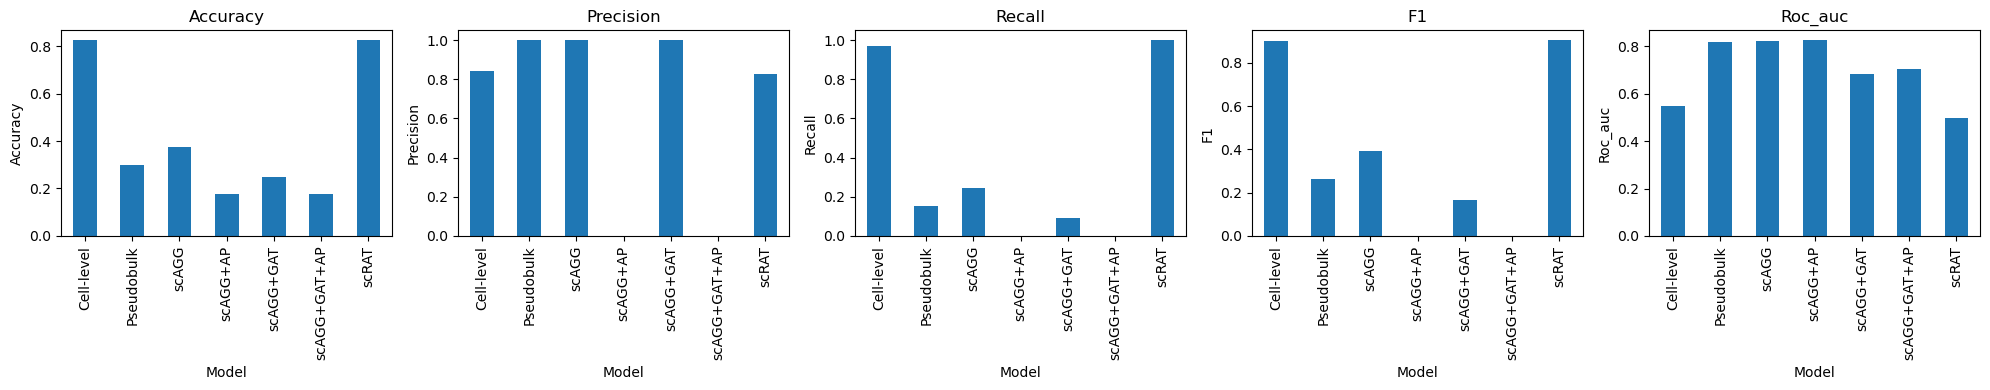

In [12]:
import matplotlib.pyplot as plt

# Parse the performance data
df = parse_performance_json("SeaAD")

metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=False)

for i, metric in enumerate(metrics):
    avg = df.groupby("model")[metric].mean()
    std = df.groupby("model")[metric].std()
    avg.plot(
        kind="bar",
        yerr=std,
        ax=axes[i],
        title=metric.capitalize(),
        capsize=4,
        legend=False
    )
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_xlabel("Model")

plt.tight_layout()
plt.show()